In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importance_sampler as isamp
import scipy.stats
import corner
%matplotlib inline

In [2]:
plt.rc("font", size=18, family="serif")
plt.rc("text", usetex=True)

In [3]:
means = np.array([3.0, -0.0])
stddevs = np.array([1.0, 0.1]) #standard deviations
rho = -0.99 #correlation
cov = np.array([[stddevs[0]**2, rho*stddevs[0]*stddevs[1]],
                [rho*stddevs[0]*stddevs[1], stddevs[1]]])
#cov = np.array([[1,0.1],[0.1,0.5]])
icov = np.linalg.inv(cov)

In [4]:
N_samples = 100000
chain = np.random.multivariate_normal(mean=means, cov=cov, size=N_samples)
likes = scipy.stats.multivariate_normal.pdf(chain, mean=means, cov=cov)

Text(0,0.5,'$y$')

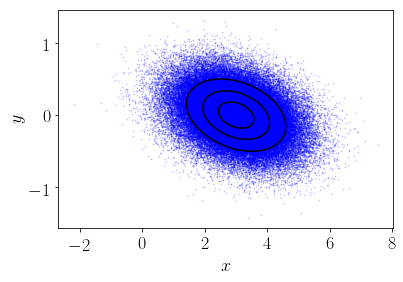

In [5]:
plt.scatter(chain[:,0], chain[:,1], c='b', s=0.5, alpha=0.2)
plt.tricontour(chain[:,0], chain[:,1], likes, 4, colors='k')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

In [6]:
IS = isamp.ImportanceSampler(chain, likes)
IS.select_training_points(100, method="circular")
IS.train()

Text(0,0.5,'$y$')

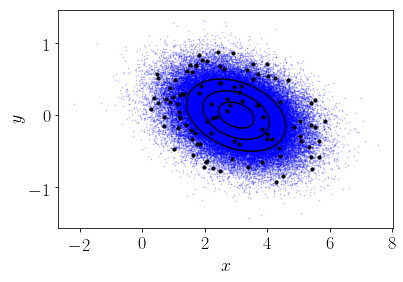

In [7]:
plt.scatter(chain[:,0], chain[:,1], c='b', s=0.5, alpha=0.2)
plt.tricontour(chain[:,0], chain[:,1], likes, 4, colors='k')
points,_,_ = IS.get_training_data()
plt.scatter(points[:,0], points[:,1], c='k', s=10)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

Text(0,0.5,'$y$')

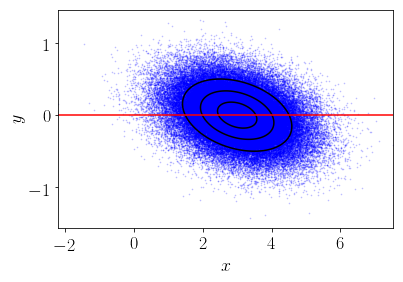

In [8]:
xp = np.linspace(np.min(chain[:,0]), np.max(chain[:,0]))
yp = np.zeros_like(xp) + means[1]

plt.scatter(chain[:,0], chain[:,1], c='b', s=0.5, alpha=0.2)
plt.tricontour(chain[:,0], chain[:,1], likes, 4, colors='k')
plt.plot(xp, yp, c='r')
plt.xlim(xp[0], xp[-1])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

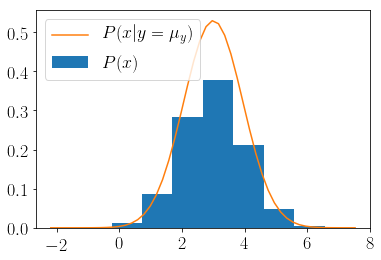

In [9]:
p = np.vstack((xp,yp)).T
lnLp = IS.predict(p)
Lp = np.exp(lnLp)
plt.hist(chain[:,0], density=True, label=r"$P(x)$")
plt.plot(xp, Lp, label=r"$P(x|y=\mu_y)$")
plt.legend()

In [10]:
means2 = np.array([4.5, 0.0])
stddevs2 = np.array([0.2, 0.1]) #standard deviations
rho2 = 0.9 #correlation
cov2 = np.array([[stddevs2[0]**2, rho2*stddevs2[0]*stddevs2[1]],
                [rho2*stddevs2[0]*stddevs2[1], stddevs2[1]]])
#cov2 = np.array([[1,0.1],[0.1,0.5]])
icov2 = np.linalg.inv(cov2)

In [11]:
chain2 = np.random.multivariate_normal(mean=means2, cov=cov2, size=N_samples)
likes2 = scipy.stats.multivariate_normal.pdf(chain2, mean=means2, cov=cov2)

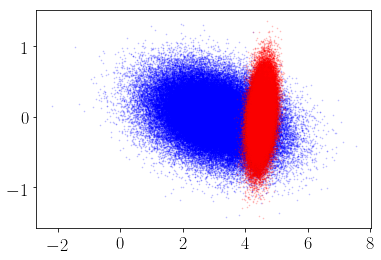

In [12]:
plt.scatter(chain[:,0], chain[:,1], c='b', s=0.5, alpha=0.2)
plt.scatter(chain2[:,0], chain2[:,1], c='r', s=0.5, alpha=0.2)

In [13]:
chunk = N_samples/100
lnL_M1 = np.zeros_like(likes2)
for i in range(100):
    lnL_M1[i*chunk:(i+1)*chunk] = IS.predict(chain2[i*chunk:(i+1)*chunk])

#lnL_M1 = IS.predict(chain2)
likes_of1_at_2 = np.exp(lnL_M1)
weights = likes_of1_at_2/likes2

(-0.8, 0.8)

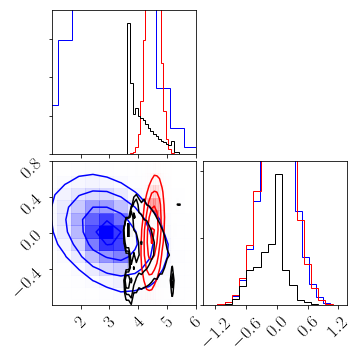

In [14]:
fig = corner.corner(chain, color='b', plot_datapoints=False)
ax = fig.axes
corner.corner(chain2, color='r', fig=fig, plot_datapoints=False)
corner.corner(chain2, weights=weights, color='k', fig=fig,  plot_datapoints=False)
ax[0].set_xlim(1, 6)
ax[2].set_xlim(1, 6)
ax[2].set_ylim(-0.8, 0.8)

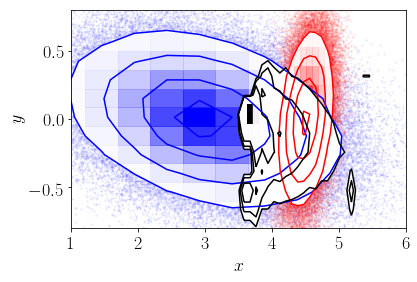

In [15]:
corner.hist2d(chain[:,0], chain[:,1], color='b', plot_datapoints=1)
corner.hist2d(chain2[:,0], chain2[:,1], color='r', plot_datapoints=1)
corner.hist2d(chain2[:,0], chain2[:,1], weights=weights, color='k', 
              plot_datapoints=False)
ax = plt.gca()
ax.set_xlim(1, 6)
ax.set_ylim(-0.8, 0.8)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.savefig("gaussian_example.png", dpi=300)